In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = load_iris()
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, random_state = 42)
y_train_scaled = y_train

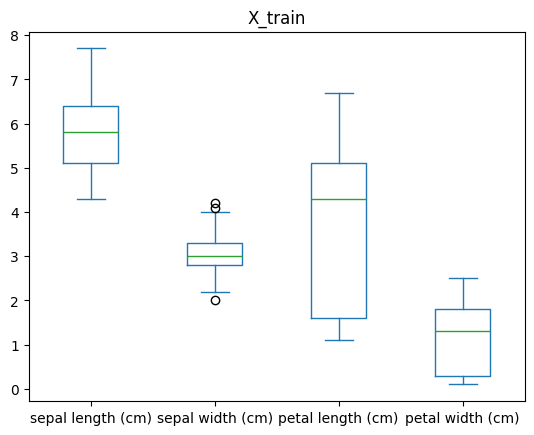

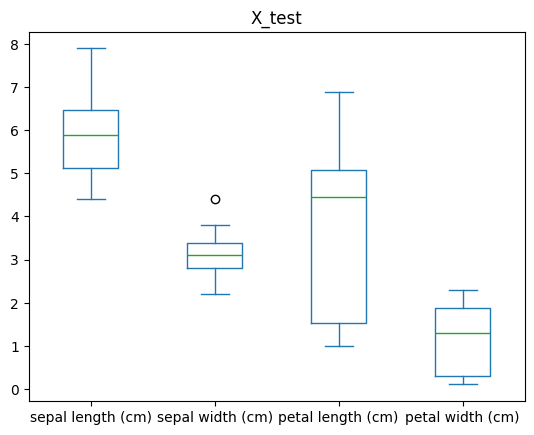

In [3]:
X_train.plot(kind = "box")
plt.title("X_train")
plt.show()

X_test.plot(kind = "box")
plt.title("X_test")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [6]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test_scaled)
accuracy_score(y_test, pred)

1.0

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

X_train_scaled[:5]

array([[-1.01827123,  1.2864604 , -1.39338902, -1.3621769 ],
       [-0.7730102 ,  2.43545215, -1.33550342, -1.49647603],
       [-0.03722712, -0.78172474,  0.74837808,  0.92090833],
       [ 0.20803391,  0.8268637 ,  0.4010645 ,  0.51801093],
       [ 1.06644751,  0.13746866,  0.51683569,  0.3837118 ]])

In [10]:
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [13]:
print(train)
print("--------------------------------------------")
print(test)

                 Player Pos   3P  TRB  BLK
0      Denzel Valentine  SG  1.3  2.6  0.1
1           Kyle Korver  SG  2.4  2.8  0.3
2          Troy Daniels  SG  2.1  1.5  0.1
3          Tim Hardaway  SG  1.9  2.8  0.2
4        Dewayne Dedmon   C  0.0  6.5  0.8
..                  ...  ..  ...  ...  ...
75       Victor Oladipo  SG  1.9  4.3  0.3
76  Willie Cauley-Stein   C  0.0  4.5  0.6
77          Brook Lopez   C  1.8  5.4  1.7
78      Josh Richardson  SG  1.4  3.2  0.7
79         Lou Williams  SG  2.0  2.5  0.2

[80 rows x 5 columns]
--------------------------------------------
                  Player Pos   3P   TRB  BLK
0           JaVale McGee   C  0.0   3.2  0.9
1          Manu Ginobili  SG  1.3   2.3  0.2
2           Nene Hilario   C  0.0   4.2  0.6
3          Evan Fournier  SG  1.9   3.1  0.1
4   Georgios Papagiannis   C  0.0   3.9  0.8
5          Anthony Davis   C  0.5  11.8  2.2
6            Tarik Black   C  0.0   5.1  0.7
7         Jamal Crawford  SG  1.4   1.6  0.2
8        Jo

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2
max_k_range #최적의 K값을 구하기 위한 용도로 활용

40

In [17]:
k_list = []

for i in range(3, max_k_range, 2):
    k_list.append(i)

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [26]:
cross_validation_scores = []
X_train = train[['3P', 'BLK', 'TRB']]
y_train = train['Pos']

print(type(y_train))
for k in k_list : 
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train.values, cv = 10, scoring = 'accuracy')
    # print(scores)
    cross_validation_scores.append(scores.mean())

cross_validation_scores

<class 'pandas.core.series.Series'>


[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

In [28]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]

print("The best number of k : " + str(k))


The best number of k : 3


In [31]:
import os

print(os.cpu_count())

8


In [37]:
X_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]
print(k)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train.values.ravel())

3


KNeighborsClassifier(n_neighbors=3)

In [38]:
X_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

In [39]:
pred = knn.predict(X_test)
pred

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [40]:
comparison = pd.DataFrame({'prediction' : pred, 'ground_truth' : y_test.values.ravel()})

comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [41]:
print('accuracy : ', str(accuracy_score(y_test.values.ravel(), pred)))

accuracy :  0.95


In [43]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [45]:
df = pd.read_csv("boston_house.csv")
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [46]:
x_data = df.drop("Target", axis = 1)
y_data = df["Target"]

In [47]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.3, random_state = 0)

In [49]:
estimator = KNeighborsRegressor(n_neighbors = 5, metric = "minkowski")
estimator.fit(x_train, y_train)

KNeighborsRegressor()

In [50]:
pred = estimator.predict(x_test)
score = metrics.r2_score(y_test, pred)
score

0.5166480241894266